<a href="https://colab.research.google.com/github/LKVan/Lab2_ML/blob/van/Lab_6_20130462_LeKhanhVan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with classification task using **Random Forests** and **Naïve Bayes** algorithms with/without **Feature Selection**. 

*   **Deadline: 23:59, 25/03/2023**



# Import libraries

In [81]:
# connect drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML_Lab6'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML_Lab6


In [82]:
# code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from prettytable import PrettyTable
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


#Task 1. 
Task 1. Compare the performance of selected classification algorithms including **Random forest**, **NaiveBayes**, and **SVM** with **mnist** dataset based on **accuracy, precision, recall, f1** measures according to **without using selection feature** and **using selection feature**.



In [ ]:
# code
mnist = datasets.load_digits(as_frame=True)
X = mnist.data
Y = mnist.target

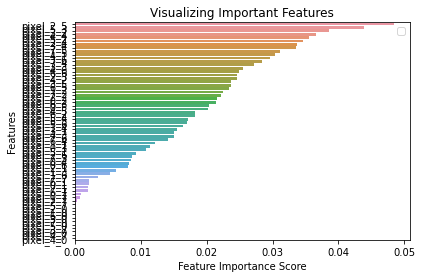

In [ ]:
# using selection feature
#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X,Y)

feature_imp = pd.Series(clf.feature_importances_,index=mnist.feature_names).sort_values(ascending=False)
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

features = feature_imp.index[0:5].values
X_new = X[feature_imp.index[0:5]]
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(X_new, Y, test_size=0.3, random_state=1)

# without using selection feature
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, train_size=0.7,
random_state=None, shuffle=True, stratify=None)

t = PrettyTable(['Algorithms', 'Accuraty','Precision','Recall','F1'])

In [ ]:
# Random forest without using selection feature
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

accuracy_rf = round(metrics.accuracy_score(y_test,y_pred_rf),4)
precision_rf = round(metrics.precision_score(y_test,y_pred_rf,average='macro'),4)
recall_rf = round(metrics.recall_score(y_test,y_pred_rf,average='macro'),4)
f1_rf = round(metrics.f1_score(y_test,y_pred_rf,average='macro'),4)
t.add_row(['RFwithoutSelectionFeature', accuracy_rf,precision_rf,recall_rf,f1_rf])

In [ ]:
# Random forest using selection feature
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_new,y_train_new)
y_pred_rf = rf.predict(x_test_new)

accuracy_rf = round(metrics.accuracy_score(y_test_new,y_pred_rf),4)
precision_rf = round(metrics.precision_score(y_test_new,y_pred_rf,average='macro'),4)
recall_rf = round(metrics.recall_score(y_test_new,y_pred_rf,average='macro'),4)
f1_rf = round(metrics.f1_score(y_test_new,y_pred_rf,average='macro'),4)
t.add_row(['RFUsingSelectionFeature', accuracy_rf,precision_rf,recall_rf,f1_rf])

In [ ]:
# SVM linear without using selection feature
linear = svm.SVC(kernel='linear')
linear.fit(x_train,y_train)
y_pred_linear = linear.predict(x_test)

accuracy_linear = round(metrics.accuracy_score(y_test,y_pred_linear),4)
precision_linear = round(metrics.precision_score(y_test,y_pred_linear,average='macro'),4)
recall_linear = round(metrics.recall_score(y_test,y_pred_linear,average='macro'),4)
f1_linear = round(metrics.f1_score(y_test,y_pred_linear,average='macro'),4)
t.add_row(['SVM without using selection feature', accuracy_linear,precision_linear,recall_linear,f1_linear])

In [ ]:
# SVM linear using selection feature
linear = svm.SVC(kernel='linear')
linear.fit(x_train_new,y_train_new)
y_pred_linear = linear.predict(x_test_new)

accuracy_linear = round(metrics.accuracy_score(y_test_new,y_pred_linear),4)
precision_linear = round(metrics.precision_score(y_test_new,y_pred_linear,average='macro'),4)
recall_linear = round(metrics.recall_score(y_test_new,y_pred_linear,average='macro'),4)
f1_linear = round(metrics.f1_score(y_test_new,y_pred_linear,average='macro'),4)
t.add_row(['SVM using selection feature', accuracy_linear,precision_linear,recall_linear,f1_linear])

In [ ]:
# GaussianNB without using selection feature
gau = GaussianNB()
gau.fit(x_train,y_train)
y_pred_gau = gau.predict(x_test)

accuracy_gau = round(metrics.accuracy_score(y_test,y_pred_gau),4)
precision_gau = round(metrics.precision_score(y_test,y_pred_gau,average='macro'),4)
recall_gau = round(metrics.recall_score(y_test,y_pred_gau,average='macro'),4)
f1_gau = round(metrics.f1_score(y_test,y_pred_gau,average='macro'),4)
t.add_row(['GaussianNBwithoutSelectionFeature', accuracy_gau,precision_gau,recall_gau,f1_gau])

In [ ]:
# GaussianNB using selection feature
gau = GaussianNB()
gau.fit(x_train_new,y_train_new)
y_pred_gau = gau.predict(x_test_new)

accuracy_gau = round(metrics.accuracy_score(y_test_new,y_pred_gau),4)
precision_gau = round(metrics.precision_score(y_test_new,y_pred_gau,average='macro'),4)
recall_gau = round(metrics.recall_score(y_test_new,y_pred_gau,average='macro'),4)
f1_gau = round(metrics.f1_score(y_test_new,y_pred_gau,average='macro'),4)
t.add_row(['GaussianNBusingSelectionFeature', accuracy_gau,precision_gau,recall_gau,f1_gau])

In [ ]:
print(t)

+-------------------------------------+----------+-----------+--------+--------+
|              Algorithms             | Accuraty | Precision | Recall |   F1   |
+-------------------------------------+----------+-----------+--------+--------+
|      RFwithoutSelectionFeature      |  0.9704  |   0.9715  | 0.9702 | 0.9703 |
|       RFUsingSelectionFeature       |  0.7315  |   0.7307  | 0.7297 | 0.725  |
| SVM without using selection feature |  0.9815  |   0.9806  | 0.9804 | 0.9804 |
|     SVM using selection feature     |  0.7111  |   0.6974  | 0.7047 | 0.6946 |
|  GaussianNBwithoutSelectionFeature  |  0.8352  |   0.864   | 0.8322 | 0.8343 |
|   GaussianNBusingSelectionFeature   |  0.6963  |   0.6713  | 0.6886 | 0.6702 |
+-------------------------------------+----------+-----------+--------+--------+


#Task 2. 
For given bank dataset (bank.csv) having the following attributes :
1.	**age** (numeric)
2.	**job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.	**marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.	**education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.	**default**: has credit in default? (categorical: 'no','yes','unknown')
6.	**housing**: has housing loan? (categorical: 'no','yes','unknown')
7.	**loan**: has personal loan? (categorical: 'no','yes','unknown')
8.	**contact**: contact communication type (categorical: 'cellular','telephone')
9.	**month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.	**day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.	**duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12.	**campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.	**pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.	**previous**: number of contacts performed before this campaign and for this client (numeric)
15.	**poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Output variable (desired target):
16.	**y**. has the client subscribed a term deposit? (binary: 'yes','no')



In [ ]:
bank = pd.read_csv('bank.csv')
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

#3.1. Apply StandardScaler() function to columns that contains numerical data ('age', 'balance', 'day', 'campaign', 'pdays', 'previous')

In [ ]:
#code
stadard = StandardScaler().fit_transform(bank[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']])
bank[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']] = stadard

#3.2. Apply Encode Categorical Value (OneHotEncoder) to transfrom categorical data to numerical data ('job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome')

In [ ]:
#code
onehot = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)
encode = onehot.fit_transform(bank[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']])
print(encode.shape)
merged = np.hstack((bank[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']].values,encode))
print(merged)

(11162, 35)
[[ 1.49150488  0.25252514 -1.26574556 ...  0.          0.
   1.        ]
 [ 1.23967567 -0.4599736  -1.26574556 ...  0.          0.
   1.        ]
 [-0.0194704  -0.0801603  -1.26574556 ...  0.          0.
   1.        ]
 ...
 [-0.77495804 -0.46493443  0.39689074 ...  0.          0.
   1.        ]
 [ 0.14841574 -0.47392593 -0.90946635 ...  0.          0.
   0.        ]
 [-0.6070719  -0.47392593 -0.79070662 ...  0.          0.
   1.        ]]


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#3.3. Apply **Decision tree, Random forest, kNN, NaïveBayes** to preproceed dataset in the previous steps. Then compare the obtained results using **accuracy, precision, recall, f1** measures.

In [ ]:
#code
X_train_task2, X_test_task2, Y_train_task2, Y_test_task2 = train_test_split(merged, bank['deposit'], test_size = 0.3, train_size=0.7,random_state=1)

In [ ]:
# Decision Tree
clf_DT = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5)
clf_DT.fit(X_train_task2, Y_train_task2)
y_pred_DT = clf_DT.predict(X_test_task2)

aces_DT = round(metrics.accuracy_score(Y_test_task2,y_pred_DT),4)
precision_DT = round(metrics.precision_score(Y_test_task2, y_pred_DT, average='macro'),4)
recall_DT = round(metrics.recall_score(Y_test_task2, y_pred_DT, average='macro'),4)
f1_DT = round(metrics.f1_score(Y_test_task2, y_pred_DT, average='macro'),4)

In [ ]:
# Random Forest 
rf_task2 = RandomForestClassifier(n_estimators=100)
rf_task2.fit(X_train_task2, Y_train_task2)
y_pred_rf_task2 = rf_task2.predict(X_test_task2)

aces_RF = round(metrics.accuracy_score(Y_test_task2, y_pred_rf_task2),4)
precision_RF = round(metrics.precision_score(Y_test_task2,y_pred_rf_task2, average='macro'),4)
recall_RF = round(metrics.recall_score(Y_test_task2, y_pred_rf_task2, average='macro'),4)
f1_RF = round(metrics.f1_score(Y_test_task2, y_pred_rf_task2, average='macro'),4)

In [ ]:
# kNN
kNN = KNeighborsClassifier(n_neighbors = 5)
kNN.fit(X_train_task2, Y_train_task2)
y_pred_kNN = kNN.predict(X_test_task2)

aces_kNN = round(metrics.accuracy_score(Y_test_task2, y_pred_kNN ),4)
precision_kNN = round(metrics.precision_score(Y_test_task2, y_pred_kNN , average='macro'),4)
recall_kNN = round(metrics.recall_score(Y_test_task2, y_pred_kNN , average='macro'),4)
f1_kNN = round(metrics.f1_score(Y_test_task2, y_pred_kNN , average='macro'),4)

In [ ]:
# NaiveBayes 
nb_task2 = GaussianNB()
nb_task2.fit(X_train_task2, Y_train_task2)
y_pred_NB = nb_task2.predict(X_test_task2)

aces_NB = round(metrics.accuracy_score(Y_test_task2, y_pred_NB),4)
precision_NB =round(metrics.precision_score(Y_test_task2, y_pred_NB, average='macro'),4)
recall_NB = round(metrics.recall_score(Y_test_task2, y_pred_NB, average='macro'),4)
f1_NB = round(metrics.f1_score(Y_test_task2, y_pred_NB, average='macro'),4)

In [ ]:
table_task2 = PrettyTable(["","Accuracy", "Precision", "Recall", "F1"])

table_task2.add_row(["Decision Tree ", aces_DT, precision_DT, recall_DT, f1_DT])
table_task2.add_row(["Random Forest  ",aces_RF, precision_RF, recall_RF, f1_RF])
table_task2.add_row(["KNN  ",aces_kNN, precision_kNN, recall_kNN, f1_kNN])
table_task2.add_row(["NaiveBayes   ",aces_NB, precision_NB, recall_NB, f1_NB])

print(table_task2)

+-----------------+----------+-----------+--------+--------+
|                 | Accuracy | Precision | Recall |   F1   |
+-----------------+----------+-----------+--------+--------+
|  Decision Tree  |  0.6411  |   0.6415  | 0.6418 | 0.641  |
| Random Forest   |  0.7235  |   0.7274  | 0.719  | 0.7191 |
|      KNN        |  0.6772  |   0.6783  | 0.6731 | 0.6729 |
|  NaiveBayes     |  0.6745  |   0.703   | 0.6637 | 0.6534 |
+-----------------+----------+-----------+--------+--------+


#3.4. Using selection feature to above dataset, then compare the classification results with those in Task 2.3. 

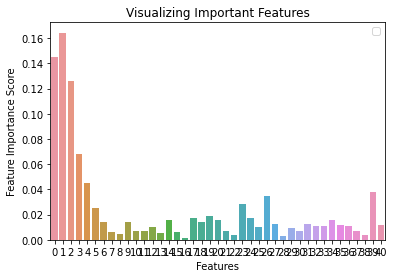

(11162, 5)
(11162, 17)


In [ ]:
#code
# using selection feature
#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(merged,bank['deposit'])
index = range(0,41)
feature_imp = pd.Series(clf.feature_importances_,index=index).sort_values(ascending=False)
%matplotlib inline
# Creating a bar plot
sns.barplot(y=feature_imp, x=feature_imp.index)
# Add labels to your graph
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

X_new = merged[:,feature_imp.index[0:5]]
print(X_new.shape)
print(bank.shape)
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(X_new, bank['deposit'], test_size=0.3, random_state=1)


In [ ]:
# Decision Tree
clf_DT = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5)
clf_DT.fit(x_train_new, y_train_new)
y_pred_DT = clf_DT.predict(x_test_new)

aces_DT = round(metrics.accuracy_score(y_test_new,y_pred_DT),4)
precision_DT = round(metrics.precision_score(y_test_new, y_pred_DT, average='macro'),4)
recall_DT = round(metrics.recall_score(y_test_new, y_pred_DT, average='macro'),4)
f1_DT = round(metrics.f1_score(y_test_new, y_pred_DT, average='macro'),4)

In [ ]:
# Random Forest 
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_new, y_train_new)
y_pred_rf = rf.predict(x_test_new)

aces_RF = round(metrics.accuracy_score(y_test_new, y_pred_rf),4)
precision_RF = round(metrics.precision_score(y_test_new,y_pred_rf, average='macro'),4)
recall_RF = round(metrics.recall_score(y_test_new, y_pred_rf, average='macro'),4)
f1_RF = round(metrics.f1_score(y_test_new, y_pred_rf, average='macro'),4)

In [ ]:
# kNN
kNN = KNeighborsClassifier(n_neighbors = 5)
kNN.fit(x_train_new, y_train_new)
y_pred_kNN = kNN.predict(x_test_new)

aces_kNN = round(metrics.accuracy_score(y_test_new, y_pred_kNN ),4)
precision_kNN = round(metrics.precision_score(y_test_new, y_pred_kNN , average='macro'),4)
recall_kNN = round(metrics.recall_score(y_test_new, y_pred_kNN , average='macro'),4)
f1_kNN = round(metrics.f1_score(y_test_new, y_pred_kNN , average='macro'),4)

In [ ]:
# NaiveBayes 
nb = GaussianNB()
nb.fit(x_train_new, y_train_new)
y_pred_NB = nb.predict(x_test_new)

aces_NB = round(metrics.accuracy_score(y_test_new, y_pred_NB),4)
precision_NB =round(metrics.precision_score(y_test_new, y_pred_NB, average='macro'),4)
recall_NB = round(metrics.recall_score(y_test_new, y_pred_NB, average='macro'),4)
f1_NB = round(metrics.f1_score(y_test_new, y_pred_NB, average='macro'),4)

In [ ]:
table_task3 = PrettyTable(["","Accuracy", "Precision", "Recall", "F1"])

table_task3.add_row(["Decision Tree ", aces_DT, precision_DT, recall_DT, f1_DT])
table_task3.add_row(["Random Forest  ",aces_RF, precision_RF, recall_RF, f1_RF])
table_task3.add_row(["KNN  ",aces_kNN, precision_kNN, recall_kNN, f1_kNN])
table_task3.add_row(["NaiveBayes   ",aces_NB, precision_NB, recall_NB, f1_NB])

print(table_task3)

+-----------------+----------+-----------+--------+--------+
|                 | Accuracy | Precision | Recall |   F1   |
+-----------------+----------+-----------+--------+--------+
|  Decision Tree  |  0.6408  |   0.6639  | 0.6293 | 0.6156 |
| Random Forest   |  0.6411  |   0.6414  | 0.6365 | 0.6357 |
|      KNN        |  0.6277  |   0.6265  | 0.6246 | 0.6245 |
|  NaiveBayes     |  0.6127  |   0.6116  | 0.6114 | 0.6115 |
+-----------------+----------+-----------+--------+--------+


#Task 4. 
For a given dataset in the Lab #5 (**credit card dataset**), perform feature selection and thencompare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression, SVM, Random Forest and NaiveBayes) based on accuracy, precision, recall, f1 measures.


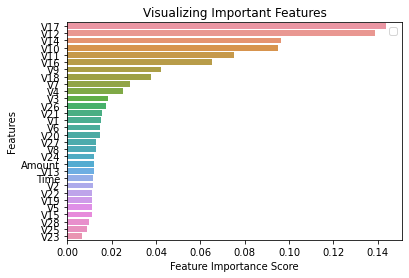

In [84]:
# code
credit = pd.read_csv('creditcard.csv')
X = credit.iloc[:,:-1]
Y= credit['Class']

# using selection feature
#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X,Y)

feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

features = feature_imp.index[0:5].values
X_new = X[feature_imp.index[0:5]]

x_train, x_test, y_train, y_test = train_test_split(X,Y ,test_size=0.3, train_size=0.7,
random_state=None, shuffle=True, stratify=None)

In [85]:
# Logistic Regression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

y_pred_logictis = classifier.predict(x_test)

accuracy_logictis = round(metrics.accuracy_score(y_test,y_pred_logictis),4)
precision_logictis = round(metrics.precision_score(y_test,y_pred_logictis,average='macro'),4)
recall_logictis = round(metrics.recall_score(y_test,y_pred_logictis,average='macro'),4)
f1_logictis = round(metrics.f1_score(y_test,y_pred_logictis,average='macro'),4)

# kNN
kNN = KNeighborsClassifier(n_neighbors= 3)
kNN.fit(x_train,y_train)
y_pred_kNN = kNN.predict(x_test)

accuracy_kNN = round(metrics.accuracy_score(y_test,y_pred_kNN),4)
precision_kNN = round(metrics.precision_score(y_test,y_pred_kNN,average='macro'),4)
recall_kNN = round(metrics.recall_score(y_test,y_pred_kNN,average='macro'),4)
f1_kNN = round(metrics.f1_score(y_test,y_pred_kNN,average='macro'),4)

# Decision tree
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,
max_depth=3, min_samples_leaf=5)
clf_model.fit(x_train,y_train)

y_pred_decision = clf_model.predict(x_test)

accuracy_decision = round(metrics.accuracy_score(y_test,y_pred_decision),4)
precision_decision = round(metrics.precision_score(y_test,y_pred_decision,average='macro'),4)
recall_decision = round(metrics.recall_score(y_test,y_pred_decision,average='macro'),4)
f1_decision = round(metrics.f1_score(y_test,y_pred_decision,average='macro'),4)
# SVM
linear = svm.SVC(kernel='linear')
linear.fit(x_train,y_train)
y_pred_linear = linear.predict(x_test)

accuracy_linear = round(metrics.accuracy_score(y_test,y_pred_linear),4)
precision_linear = round(metrics.precision_score(y_test,y_pred_linear,average='macro'),4)
recall_linear = round(metrics.recall_score(y_test,y_pred_linear,average='macro'),4)
f1_linear = round(metrics.f1_score(y_test,y_pred_linear,average='macro'),4)
# Random Forest 
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

aces_RF = round(metrics.accuracy_score(y_test, y_pred_rf),4)
precision_RF = round(metrics.precision_score(y_test,y_pred_rf, average='macro'),4)
recall_RF = round(metrics.recall_score(y_test, y_pred_rf, average='macro'),4)
f1_RF = round(metrics.f1_score(y_test, y_pred_rf, average='macro'),4)

table_task = PrettyTable(["Algorithms","Accuracy", "Precision", "Recall", "F1"])

table_task.add_row(["Logictis Regression ", accuracy_logictis, precision_logictis, recall_logictis, f1_logictis])
table_task.add_row(["SVM ", accuracy_linear, precision_linear, recall_linear, f1_linear])
table_task.add_row(["Decision Tree ", aces_DT, precision_DT, recall_DT, f1_DT])
table_task.add_row(["Random Forest  ",aces_RF, precision_RF, recall_RF, f1_RF])
table_task.add_row(["KNN  ",aces_kNN, precision_kNN, recall_kNN, f1_kNN])
table_task.add_row(["NaiveBayes   ",aces_NB, precision_NB, recall_NB, f1_NB])


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
print(table_task)

+----------------------+----------+-----------+--------+--------+
|      Algorithms      | Accuracy | Precision | Recall |   F1   |
+----------------------+----------+-----------+--------+--------+
| Logictis Regression  |  0.9987  |   0.8286  | 0.8202 | 0.8244 |
|         SVM          |  0.9984  |   0.8254  | 0.6441 | 0.6996 |
|    Decision Tree     |  0.6408  |   0.6639  | 0.6293 | 0.6156 |
|   Random Forest      |  0.9995  |   0.9631  | 0.9038 | 0.9314 |
|        KNN           |  0.6277  |   0.9277  | 0.5384 | 0.5702 |
|    NaiveBayes        |  0.6127  |   0.6116  | 0.6114 | 0.6115 |
+----------------------+----------+-----------+--------+--------+


#Finally,
Save a copy in your Github. Remember renaming the notebook.